In [10]:
import rebalance
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
securities = ['appl', 'c', 'gs']

# Desired allocation
target = np.asarray([0.31, 0.18, 0.11])

# Prices of assets
px = np.asarray([100.0, 25.0, 3.22])

# We have $1,000 to spend
pf_value = 1_000

# Hold 20% cash
pct_cash = 0.2

cash, shares = rebalance.optimal_portfolio(
    px = px,
    target = target,
    market_value = pf_value,
    pct_cash = pct_cash,
)


      shares   price  value
appl     4.0  100.00  400.0
c        8.0   25.00  200.0
gs      45.0    3.22  144.9
cash   255.1    1.00  255.1


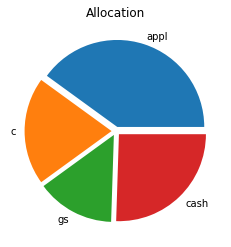

In [44]:
pf = pd.DataFrame(
    index=securities + ['cash'],
    data={
        'shares': list(shares) + [cash],
        'price': px.tolist() + [1.0],
    }
)
pf['value'] = pf['shares'] * pf['price']

print(pf)

plt.pie(
    pf['value'],
    explode = [0.05] * len(pf),
    labels = pf.index,
)
plt.gca().set_title('Allocation')
plt.plot()
None